# 讀入txt文字

In [1]:
txt = open("data.txt", "r", encoding='utf-8').read()
print(txt)

桃園機場群聚案感染再擴大，今（6）日晚間又驗出1例，也就是說機場相關人員，包含先前公布的8例確診本土個案，現在該群聚案已經變為9例本土個案。而先前公布的8例本土個案，包含了7名清潔員與1名防疫計程車司機，其中1名清潔員以及防疫計程車司機都是感染Omicron變異株。

桃園市政府和前進指揮所指揮官王必勝也證實出現「第9位確診」，該名確診人員的工作地點位於二航廈管制區外，負責巡邏的工作，因為身體不適就自行就醫，於今日晚間確診。至於個案的詳細身份與相關檢驗值還有待釐清，王必勝已親自坐鎮桃機指揮，預計晚間11點半會公開說明相關細節。


# 用jieba拆分中文單詞

In [2]:
import jieba

txt = open("data.txt", "r", encoding='utf-8').read()
words  = jieba.lcut(txt)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\a9025\AppData\Local\Temp\jieba.cache
Loading model cost 0.747 seconds.
Prefix dict has been built successfully.


['桃園', '機場', '群聚', '案', '感染', '再', '擴大', '，', '今', '（', '6', '）', '日', '晚間', '又', '驗出', '1', '例', '，', '也', '就是', '說', '機場', '相關', '人員', '，', '包含', '先前', '公布', '的', '8', '例確診', '本土', '個案', '，', '現在', '該', '群聚', '案已', '經變', '為', '9', '例', '本土', '個案', '。', '而', '先前', '公布', '的', '8', '例', '本土', '個案', '，', '包含', '了', '7', '名清潔員', '與', '1', '名', '防疫', '計程車', '司機', '，', '其中', '1', '名清潔員', '以及', '防疫', '計程車', '司機', '都', '是', '感染', 'Omicron', '變異株', '。', '\n', '\n', '桃園', '市政府', '和', '前進', '指揮', '所指', '揮官', '王必勝', '也', '證實', '出現', '「', '第', '9', '位確診', '」', '，', '該名', '確診', '人員', '的', '工作', '地點位', '於', '二', '航廈', '管制', '區外', '，', '負責', '巡邏', '的', '工作', '，', '因為', '身體', '不適', '就', '自行', '就醫', '，', '於', '今日', '晚間', '確診', '。', '至於', '個案', '的', '詳細', '身份', '與', '相關', '檢驗', '值還', '有待', '釐', '清', '，', '王必勝', '已親', '自坐', '鎮桃機', '指揮', '，', '預計', '晚間', '11', '點半會', '公開', '說明', '相關', '細節', '。']


# MapReduce
## Map : 對數組中的每個單詞Key進行遍歷
## Reduce : 對字典的單詞鍵值對進行遍歷，並統計出現頻率 

In [3]:
counts = {}
for word in words:
    if len(word) == 1: #排除單詞字數為1的詞
        continue 
    counts[word] = counts.get(word,0) + 1 #把單詞存進字典中
print(counts)

{'桃園': 2, '機場': 2, '群聚': 2, '感染': 2, '擴大': 1, '晚間': 3, '驗出': 1, '就是': 1, '相關': 3, '人員': 2, '包含': 2, '先前': 2, '公布': 2, '例確診': 1, '本土': 3, '個案': 4, '現在': 1, '案已': 1, '經變': 1, '名清潔員': 2, '防疫': 2, '計程車': 2, '司機': 2, '其中': 1, '以及': 1, 'Omicron': 1, '變異株': 1, '市政府': 1, '前進': 1, '指揮': 2, '所指': 1, '揮官': 1, '王必勝': 2, '證實': 1, '出現': 1, '位確診': 1, '該名': 1, '確診': 2, '工作': 2, '地點位': 1, '航廈': 1, '管制': 1, '區外': 1, '負責': 1, '巡邏': 1, '因為': 1, '身體': 1, '不適': 1, '自行': 1, '就醫': 1, '今日': 1, '至於': 1, '詳細': 1, '身份': 1, '檢驗': 1, '值還': 1, '有待': 1, '已親': 1, '自坐': 1, '鎮桃機': 1, '預計': 1, '11': 1, '點半會': 1, '公開': 1, '說明': 1, '細節': 1}


# 將最後結果進行排序

In [4]:
items = list(counts.items()) #用items方法返回鍵值對
items.sort(key=lambda x:x[1], reverse=True)
print(items)

[('個案', 4), ('晚間', 3), ('相關', 3), ('本土', 3), ('桃園', 2), ('機場', 2), ('群聚', 2), ('感染', 2), ('人員', 2), ('包含', 2), ('先前', 2), ('公布', 2), ('名清潔員', 2), ('防疫', 2), ('計程車', 2), ('司機', 2), ('指揮', 2), ('王必勝', 2), ('確診', 2), ('工作', 2), ('擴大', 1), ('驗出', 1), ('就是', 1), ('例確診', 1), ('現在', 1), ('案已', 1), ('經變', 1), ('其中', 1), ('以及', 1), ('Omicron', 1), ('變異株', 1), ('市政府', 1), ('前進', 1), ('所指', 1), ('揮官', 1), ('證實', 1), ('出現', 1), ('位確診', 1), ('該名', 1), ('地點位', 1), ('航廈', 1), ('管制', 1), ('區外', 1), ('負責', 1), ('巡邏', 1), ('因為', 1), ('身體', 1), ('不適', 1), ('自行', 1), ('就醫', 1), ('今日', 1), ('至於', 1), ('詳細', 1), ('身份', 1), ('檢驗', 1), ('值還', 1), ('有待', 1), ('已親', 1), ('自坐', 1), ('鎮桃機', 1), ('預計', 1), ('11', 1), ('點半會', 1), ('公開', 1), ('說明', 1), ('細節', 1)]


# 取前十筆出現次數最多的單詞印出

In [5]:
# printNumber = len(items)
printNumber = 10
word = [None] * printNumber
count = [None] * printNumber
for i in range(printNumber):
    word[i], count[i] = items[i]
    print ("{0:<10}{1:>5}".format(word[i], count[i]))

個案            4
晚間            3
相關            3
本土            3
桃園            2
機場            2
群聚            2
感染            2
人員            2
包含            2


# 視覺化&儲存前十筆出現次數最多的單詞統計圖表

In [6]:
# 建立分析圖表資料夾以存放圖表
import os
path = '分析圖表'
if not os.path.exists(path):
    os.mkdir(path)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 加入中文字型
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

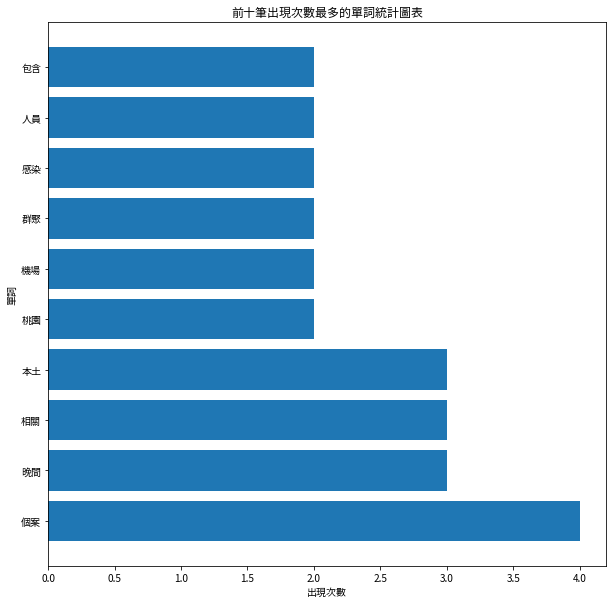

In [8]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.barh(word, count)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.subplots(figsize=(10, 10))

plt.barh(word,count) 
plt.title("前十筆出現次數最多的單詞統計圖表") 
plt.xlabel("出現次數") 
plt.ylabel("單詞") 
plt.savefig('分析圖表/高頻單詞統計圖表.png') #儲存高頻單詞統計圖表
plt.show()

# 視覺化前十筆出現次數最多的單詞WordCloud詞雲圖

In [9]:
from wordcloud import WordCloud
import PIL
import numpy as np
%matplotlib inline

#設定畫布大小
mpl.rcParams['figure.figsize']=(20,20)

#匯入圖片格式
image1 = PIL.Image.open(r'leaf.png')
MASK = np.array(image1)

![](leaf.png)

# 視覺化&儲存分析後的WordCloud詞雲圖分析

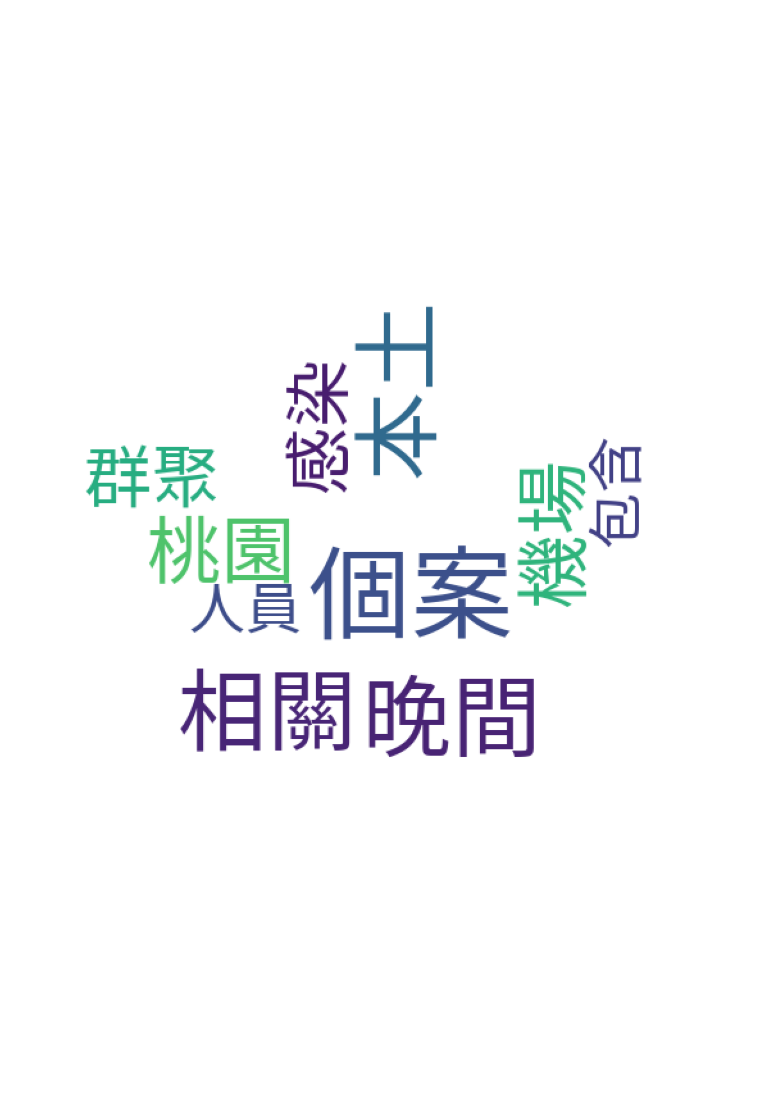

In [10]:
#獲取字型、設定背景顏色、設定字體size
wordcloud=WordCloud(font_path='TaipeiSansTCBeta-Regular.ttf',background_color='white',max_font_size=80,mask = MASK)

#利用前10個單詞畫圖
word_frequence={x[0]:x[1] for x in items[0:printNumber]}
wordcloud=wordcloud.fit_words(word_frequence)

plt.imshow(wordcloud)
plt.savefig('分析圖表/高頻單詞WordCloud詞雲圖.png') #儲存單詞WordCloud詞雲圖

plt.axis("off")
plt.show()